# Peer-graded Homework 11

Consider using Python's networkx package for this problem. For network plots, include a relevant title. For eigenvector plots, include a title and axis labels. To achieve answers most closely aligned with the key, run the command numpy.random.seed(1) before creating each network plot.

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

## a.
Create and report a network plot showing the political blogs data. (Hint: Consider using the read_edgelist function in networkx to read in the data. When plotting the network, set with_labels=False to make the plot "cleaner".) Use default node positioning. How many nodes are there? How many edges?

Number of nodes: 1222
Number of edges: 16713


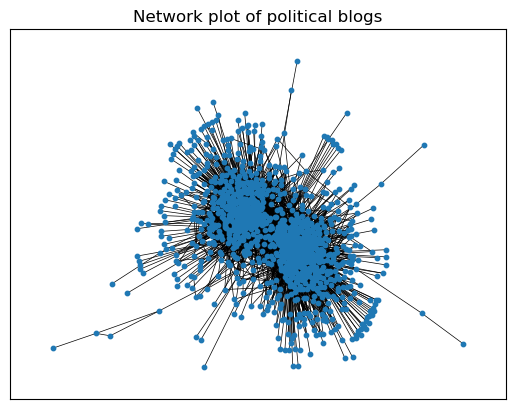

In [5]:
np.random.seed(1)

blogs = nx.read_edgelist("PoliticalBlogs.txt")

print(f"Number of nodes: {nx.number_of_nodes(blogs)}")
print(f"Number of edges: {nx.number_of_edges(blogs)}")

nx.draw_networkx(blogs, with_labels=False,
                 node_size = 10, width = 0.5)
plt.title("Network plot of political blogs");

## b. 
Perform spectral clustering on the data using $K=2$ and row normalization of eigenvectors. (Hint: The political blogs adjacency matrix serves as the $A$ matrix for spectral clustering.) Use only the top two eigenvectors. Create and report a scatterplot of the (post-normalized) eigenvectors with the component from the first eigenvector on the x-axis and second on the y-axis. Use color to indicate which node belongs to which cluster. How many nodes are in each cluster?

Number of nodes in Cluster 1: 1216
Number of nodes in Cluster 2: 6


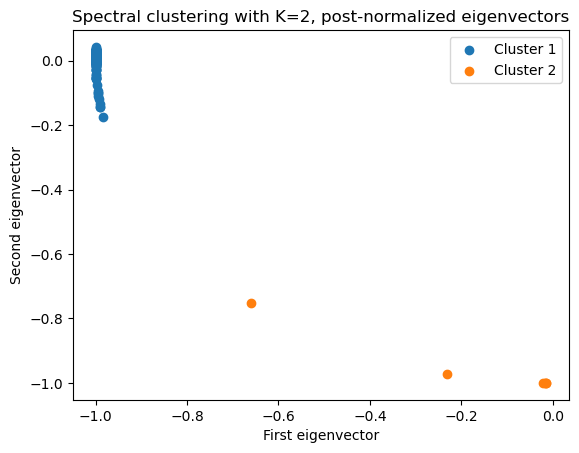

In [7]:
np.random.seed(1)

# Spectral clustering
A = nx.adjacency_matrix(blogs).todense()  # Adjacency matrix
D1 = np.diag(np.sum(A, axis=0)**(-0.5))
K1 = D1.dot(A).dot(D1)

# Top K eigenvectors
K = 2
u, s, vt = np.linalg.svd(K1)

Y = np.real(u[:, (np.argsort(np.abs(s))[::-1])[:K]])

# Normalize rows
norm_Y = np.transpose(np.transpose(Y)/np.linalg.norm(Y, axis = 1))
norm_Y = np.nan_to_num(norm_Y)

# Perform K-means clustering with K=2
kmeans = KMeans(n_clusters = K).fit(norm_Y)
labels = kmeans.labels_
cluster_1 = np.where(labels == 0)[0]
cluster_2 = np.where(labels == 1)[0]

# Number of nodes in each cluster
print(f"Number of nodes in Cluster 1: {len(cluster_1)}")
print(f"Number of nodes in Cluster 2: {len(cluster_2)}")

# Scatterplot of the post-normalized eigenvectors
plt.scatter(norm_Y[cluster_1][:, 0], norm_Y[cluster_1][:, 1], 
            label = "Cluster 1")
plt.scatter(norm_Y[cluster_2][:, 0], norm_Y[cluster_2][:, 1], 
            label = "Cluster 2")
plt.legend()
plt.xlabel("First eigenvector")
plt.ylabel("Second eigenvector")
plt.title("Spectral clustering with K=2, post-normalized eigenvectors");

## c.
Create and report a network plot showing the political blogs data, using node color to identify clusters under spectral clustering. Use default node positioning. (Note: this method should not yield very good cluster separation.)

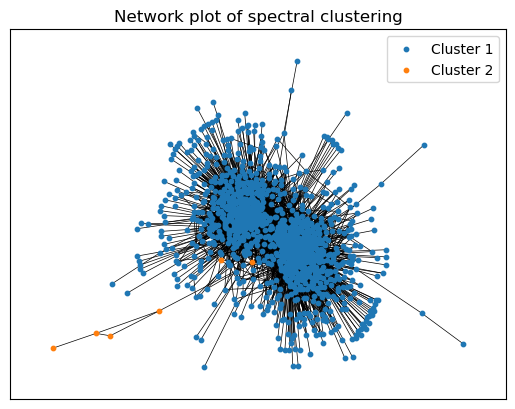

In [9]:
np.random.seed(1)

nodes = np.array(blogs.nodes())

pos = nx.spring_layout(blogs)
nx.draw_networkx_nodes(blogs, pos=pos, node_size = 10,
                       nodelist = nodes[cluster_1], 
                       node_color = "tab:blue", label = "Cluster 1")
nx.draw_networkx_nodes(blogs, pos=pos, node_size = 10, 
                       nodelist = nodes[cluster_2], 
                       node_color = "tab:orange", label = "Cluster 2")
nx.draw_networkx_edges(blogs, pos=pos, width = 0.5)
plt.legend()
plt.title("Network plot of spectral clustering");

## d.
Perform regularized spectral clustering on the data using $K=2$ and row normalization of eigenvectors. (Hint: Replace the degree matrix $D$ with $D + \tau I$.) Use only the top two eigenvectors. Use a value of $\tau$ that matches the average degree of the adjacency matrix. Create and report a scatterplot of the (post-normalized) eigenvectors with the component from the first eigenvector on the x-axis and second on the y-axis. Use color to indicate which node belongs to which cluster. How many nodes are in each cluster?

Number of nodes in Cluster 1: 670
Number of nodes in Cluster 2: 552


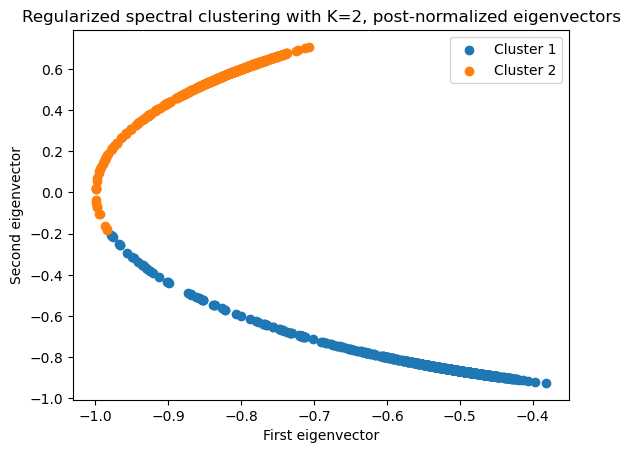

In [11]:
np.random.seed(1)

# Regularized spectral clustering
D = np.sum(A, axis = 0)
tau = np.mean(D)

D_reg = D + tau
D1_reg = np.diag(D_reg**(-0.5))
K1_reg = D1_reg.dot(A).dot(D1_reg)

# Top K eigenvectors
u, s, vt = np.linalg.svd(K1_reg)

Y = np.real(u[:, (np.argsort(np.abs(s))[::-1])[:K]])

# Normalize rows
norm_Y = np.transpose(np.transpose(Y)/np.linalg.norm(Y, axis = 1))
norm_Y = np.nan_to_num(norm_Y)

# Perform K-means clustering with K=2
kmeans = KMeans(n_clusters = K).fit(norm_Y)
labels = kmeans.labels_
reg_cluster_1 = np.where(labels == 0)[0]
reg_cluster_2 = np.where(labels == 1)[0]

# Number of nodes in each cluster
print(f"Number of nodes in Cluster 1: {len(reg_cluster_1)}")
print(f"Number of nodes in Cluster 2: {len(reg_cluster_2)}")

# Scatterplot of the post-normalized eigenvectors
plt.scatter(norm_Y[reg_cluster_1][:, 0], norm_Y[reg_cluster_1][:, 1], 
            label = "Cluster 1")
plt.scatter(norm_Y[reg_cluster_2][:, 0], norm_Y[reg_cluster_2][:, 1], 
            label = "Cluster 2")
plt.legend()
plt.xlabel("First eigenvector")
plt.ylabel("Second eigenvector")
plt.title("Regularized spectral clustering with K=2, post-normalized eigenvectors");

## e. 
Create and report a network plot showing the political blogs data, using node color to identify clusters under regularized spectral clustering. Use default node positioning. How well does this method of spectral clustering separate the groups compared to the previous method?

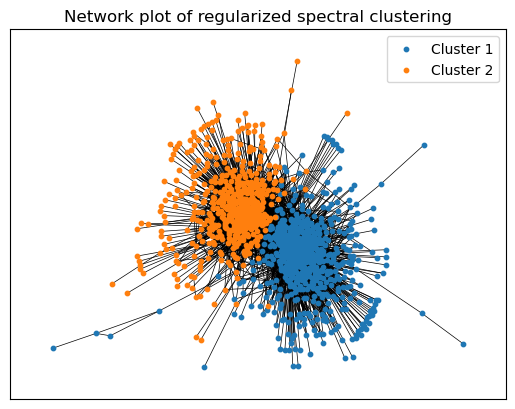

In [13]:
np.random.seed(1)

nx.draw_networkx_nodes(blogs, pos=pos, node_size = 10,
                       nodelist = nodes[reg_cluster_1], 
                       node_color = "tab:blue", label = "Cluster 1")
nx.draw_networkx_nodes(blogs, pos=pos, node_size = 10, 
                       nodelist = nodes[reg_cluster_2], 
                       node_color = "tab:orange", label = "Cluster 2")
nx.draw_networkx_edges(blogs, pos=pos, width = 0.5)
plt.legend()
plt.title("Network plot of regularized spectral clustering");

Using regularized spsectral clustering is much more accurate than the previous method. The two clusters are distinct and grouped as expected when looking at the original network plot.